In [21]:
import pandas as pd
import numpy as np
# For QQPLOT using the below library
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer,PowerTransformer,Binarizer
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [22]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [23]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [24]:
df.dropna(inplace=True)
df.shape

(714, 3)

In [25]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]


In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
X_train.head()

,Age,Fare
534,30.0,8.6625
339,45.0,35.5000
535,7.0,26.2500
722,34.0,13.0000
329,16.0,57.9792


In [27]:
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

In [28]:
accuracy_score(Y_test,y_pred)

0.6643356643356644

In [29]:
np.mean(cross_val_score(clf,X,Y,cv=10,scoring='accuracy'))

0.6303012519561815

#### DISCRETIZER

In [30]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile',subsample=None)
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='kmeans',subsample=None)

trf1 = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
],remainder='passthrough')

In [31]:
X_train_trans = trf1.fit_transform(X_train)
X_test_trans = trf1.transform(X_test)


In [32]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trans,Y_train)
y_pred = clf.predict(X_test_trans)


In [33]:
accuracy_score(Y_test,y_pred)

0.6363636363636364

In [34]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
885,0,39.0,29.1250
886,0,27.0,13.0000
887,1,19.0,30.0000
889,1,26.0,30.0000


In [35]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]
np.mean(cross_val_score(clf,X,Y,cv=10,scoring='accuracy'))

0.6247261345852895

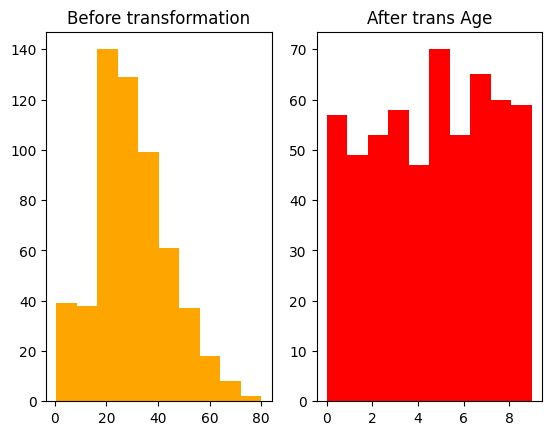

In [36]:



plt.subplot(1,2,2)
plt.hist(X_train_trans[:,0],color='red')
plt.title("After trans Age")

plt.subplot(1,2,1)
plt.hist(X_train['Age'],color='orange')
plt.title('Before transformation')

plt.show()

### BINARIZATION -  Encoding Numerical data to Categorical Data

In [37]:
df = pd.read_csv('train.csv',usecols=['Survived','Age','Fare','SibSp','Parch'])
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [38]:
df.isnull().sum()

Survived      0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [39]:
df.dropna(inplace=True)

In [40]:
df.head()

X_train,X_test,Y_train,Y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=4)
X_train.shape


(571, 4)

In [41]:
trf2 = ColumnTransformer([
    ('family',Binarizer(copy=False),[-1])
],remainder='passthrough')

In [42]:
X_train_trans = trf2.fit_transform(X_train)
X_test_trans = trf2.transform(X_test)
clf = DecisionTreeClassifier()
clf.fit(X_train_trans,Y_train)
y_pred = clf.predict(X_test_trans)
accuracy_score(Y_test,y_pred)

0.6153846153846154

In [43]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]
print(np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv = 50,scoring='accuracy')))

0.6416190476190476


##### Handling Missing numerical data using univariate analysis.